In [ ]:
pd.DateOffset

In [1]:
import pandas as pd

In [2]:
stores = pd.read_csv('D:/SampleData/stores.csv')

##### Get the date from user in the format "dd mmm' yyyy" and display the date in output as "(dddd) dd mmmm, yyyy"

In [5]:
dob = input("Enter the date (dd mmm' yyyy): " )

Enter the date (dd mmm' yyyy): 12 Feb' 1999


In [6]:
dob

"12 Feb' 1999"

In [11]:
dob1 = pd.to_datetime( dob, format = "%d %b' %Y" )
dob1

Timestamp('1999-02-12 00:00:00')

In [12]:
import datetime

In [14]:
dob2 = datetime.datetime.strptime( dob, "%d %b' %Y" )
dob2

datetime.datetime(1999, 2, 12, 0, 0)

In [17]:
dob1.strftime( '(%A) %d %B, %Y' )     # (dddd) dd mmmm, yyyy

'(Friday) 12 February, 1999'

In [18]:
dob2.strftime( '(%A) %d %B, %Y' ) 

'(Friday) 12 February, 1999'

In [19]:
ser = pd.Series(['24 Jan 2020', '29 Feb 2016', '31 Dec 2001'])
ser

0    24 Jan 2020
1    29 Feb 2016
2    31 Dec 2001
dtype: object

In [22]:
datetime.datetime.strptime( ser, '%d %b %Y' )

TypeError: strptime() argument 1 must be str, not Series

In [28]:
pd.to_datetime( ser, format = '%d %b %Y').dt.strftime( '%B %d, %Y' )

0     January 24, 2020
1    February 29, 2016
2    December 31, 2001
dtype: object

##### Get the expiry date of the product given mfg date is 1 Nov 2020 and product will expire in 6 months

In [32]:
mfg_date = '1 Nov 2020'
pd.to_datetime( mfg_date, format = '%d %b %Y' ) + pd.DateOffset( months = 6 )

Timestamp('2021-05-01 00:00:00')

### lambda functions

In [35]:
stores.iloc[0]

StoreCode                    STR101
StoreName          Electronics Zone
StoreType              Electronincs
Location                      Delhi
OperatingCost                    21
Staff_Cnt                        60
TotalSales                      160
Total_Customers                 110
AcqCostPercust                  3.9
BasketSize                     2.62
ProfitPercust                 16.46
OwnStore                          0
OnlinePresence                    1
Tenure                            4
StoreSegment                      4
Name: 0, dtype: object

In [40]:
stores[['TotalSales', 'OperatingCost']].head(2)

,TotalSales,OperatingCost
0,160.0,21.0
1,160.0,21.0


In [42]:
stores.loc[:, ['TotalSales', 'OperatingCost']].head(2)

,TotalSales,OperatingCost
0,160.0,21.0
1,160.0,21.0


In [46]:
stores.dtypes == 'int64'

StoreCode          False
StoreName          False
StoreType          False
Location           False
OperatingCost      False
Staff_Cnt           True
TotalSales         False
Total_Customers     True
AcqCostPercust     False
BasketSize         False
ProfitPercust      False
OwnStore            True
OnlinePresence      True
Tenure              True
StoreSegment        True
dtype: bool

In [48]:
# get all the variables from stores which are of int64 type
stores.loc[:, stores.dtypes == 'int64' ].head(2)

,Staff_Cnt,Total_Customers,OwnStore,OnlinePresence,Tenure,StoreSegment
0,60,110,0,1,4,4
1,60,110,0,1,4,4


In [50]:
# get all the variables from stores which are of numeric type
stores.loc[:, (stores.dtypes == 'int64') | (stores.dtypes == 'float64') ].head(2)

,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,21.0,60,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,60,160.0,110,3.9,2.875,17.02,0,1,4,4


In [65]:
# get all the variables from stores which are of numeric type
stores.select_dtypes(['int64', 'float64']).head(2)

,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,21.0,60,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,60,160.0,110,3.9,2.875,17.02,0,1,4,4


##### convert all the values from Location column to upper case

In [72]:
stores.Location.str.upper().head(2)

0    DELHI
1    DELHI
Name: Location, dtype: object

In [78]:
pd.Series(map( lambda x: x.upper(), stores.Location )).head(2)

0    DELHI
1    DELHI
dtype: object

In [80]:
stores.Location.apply( lambda x: x.upper() ).head(2)

0    DELHI
1    DELHI
Name: Location, dtype: object

##### convert all object type variables from stores to upper case

In [83]:
stores.select_dtypes('object').applymap( lambda x: x.upper() ).head(2)

,StoreCode,StoreName,StoreType,Location
0,STR101,ELECTRONICS ZONE,ELECTRONINCS,DELHI
1,STR102,APPAREL ZONE,APPAREL,DELHI


##### get the sum of only the float64 type variables

In [85]:
stores.select_dtypes('float64').sum()

OperatingCost      642.900
TotalSales        7383.100
AcqCostPercust     105.880
BasketSize         102.952
ProfitPercust      571.160
dtype: float64

In [87]:
stores.select_dtypes('float64').apply( lambda x: x.sum() )

OperatingCost      642.900
TotalSales        7383.100
AcqCostPercust     105.880
BasketSize         102.952
ProfitPercust      571.160
dtype: float64

##### get the descriptives of the float64 type variables using UDF

In [100]:
stores.describe().T.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [105]:
def fn_descriptives( x ):
    
    n_total = x.isna().count()
    nmiss = x.isna().sum()
    perc_nmiss = x.isna().sum() / n_total
    d_type = x.dtype
    
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [n_total, x.count(), nmiss, perc_nmiss, 
                          x.sum(), x.mean(), x.std(), 
                x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.1), 
                      x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                    x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()], 
                     
                index = ['total#', 'n', 'nmiss', '%nmiss', 
                         'sum', 'mean', 'std', 
                         'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'] )

In [115]:
stores.select_dtypes('float64').apply( lambda x : fn_descriptives( x ) ).head(2)

,OperatingCost,TotalSales,AcqCostPercust,BasketSize,ProfitPercust
total#,32.0,32.0,32.0,32.0,32.0
n,32.0,32.0,29.0,32.0,32.0


In [122]:
auto = pd.read_excel('D:/SampleData/AutoInsurance.xlsx', sheet_name = 0)

In [125]:
auto.select_dtypes(['int64', 'float64']).apply( lambda x: fn_descriptives(x) ).head(2)

,CASENUM,ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,CLMAGE,LOSS
total#,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0
n,1340.0,1340.0,1328.0,1324.0,1299.0,1292.0,1151.0,1340.0


In [129]:
auto.select_dtypes(['int64', 'float64']).apply( fn_descriptives ).head(2)

,CASENUM,ATTORNEY,CLMSEX,MARITAL,CLMINSUR,SEATBELT,CLMAGE,LOSS
total#,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0,1340.0
n,1340.0,1340.0,1328.0,1324.0,1299.0,1292.0,1151.0,1340.0


## Charts

# in python, we can create the charts because of matplotlib

In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### hist

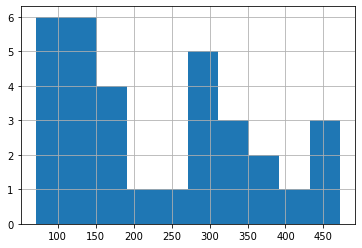

In [142]:
stores.TotalSales.hist( bins = 10 )
plt.show()

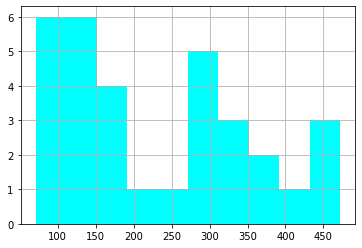

In [163]:
plt.grid(True)
plt.hist( stores.TotalSales, color = 'cyan' )
plt.show()

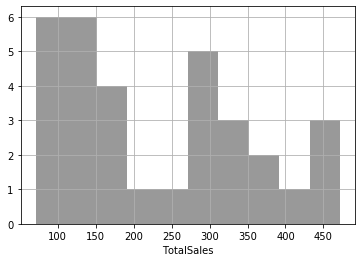

In [160]:
plt.grid(True)
sns.distplot( stores.TotalSales, kde = False, bins = 10 )
plt.show()

##### boxplots

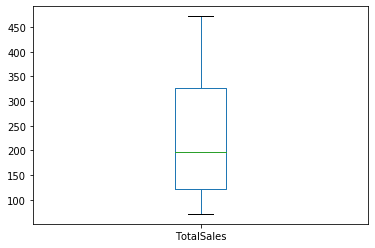

In [169]:
stores.TotalSales.plot( kind = 'box' )
plt.show()

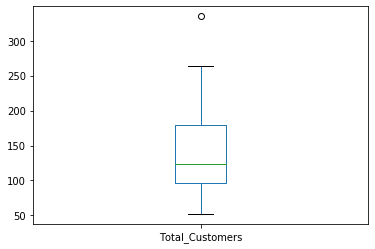

In [170]:
stores.Total_Customers.plot( kind = 'box' )
plt.show()

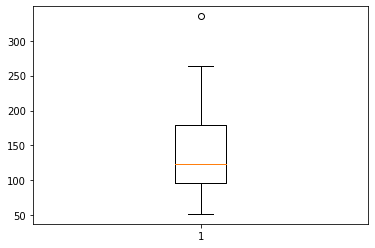

In [172]:
plt.boxplot( stores.Total_Customers )
plt.show()

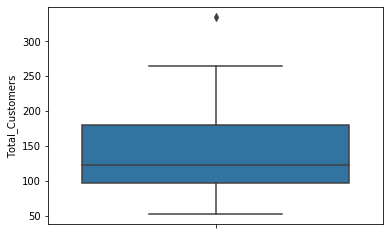

In [176]:
sns.boxplot( y = stores.Total_Customers )
plt.show()

In [181]:
a = '1.5'

In [184]:
int(float(a))

1

In [189]:
def fn_boxplot(x):
    x.plot(kind="box")
    plt.show()

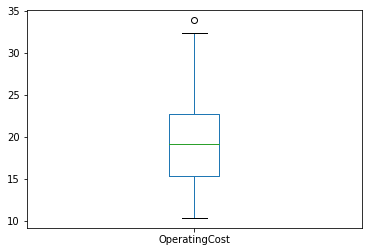

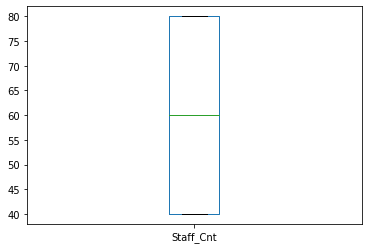

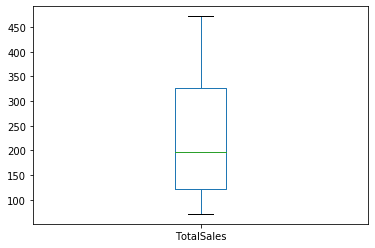

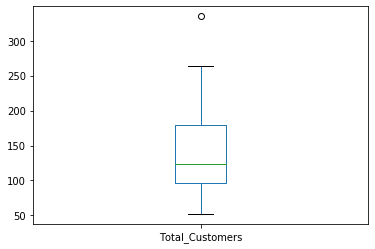

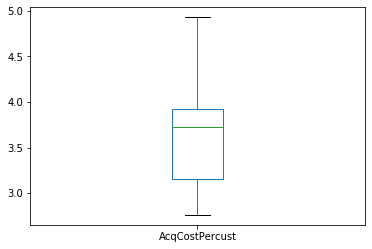

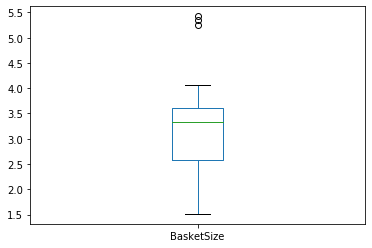

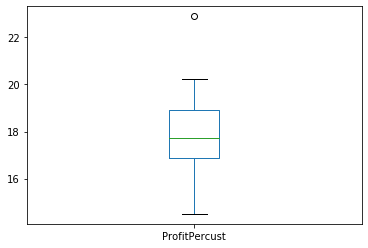

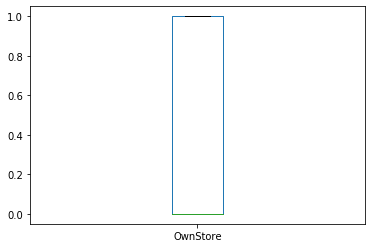

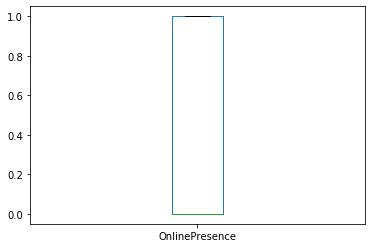

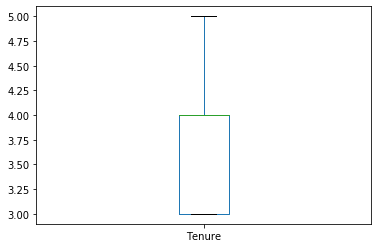

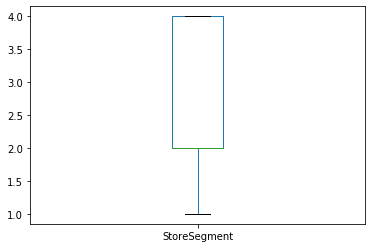

OperatingCost      None
Staff_Cnt          None
TotalSales         None
Total_Customers    None
AcqCostPercust     None
BasketSize         None
ProfitPercust      None
OwnStore           None
OnlinePresence     None
Tenure             None
StoreSegment       None
dtype: object

In [190]:
stores.select_dtypes(["int64" , "float64"]).apply(fn_boxplot )